In [1]:
import pandas as pd
from sqlalchemy import create_engine

# 数据库连接配置
username = 'root'
password = '123456'
host = 'localhost'
port = 3306
database = 'lj_ershoufang'
table_name = 'lj_ershoufangdata'

# 创建数据库连接引擎
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}?charset=utf8mb4')

# 读取数据表
df = pd.read_sql_table(table_name, engine)

# 写入 CSV 文件
df.to_csv('lianjia_data.csv', index=False, encoding='utf-8-sig')

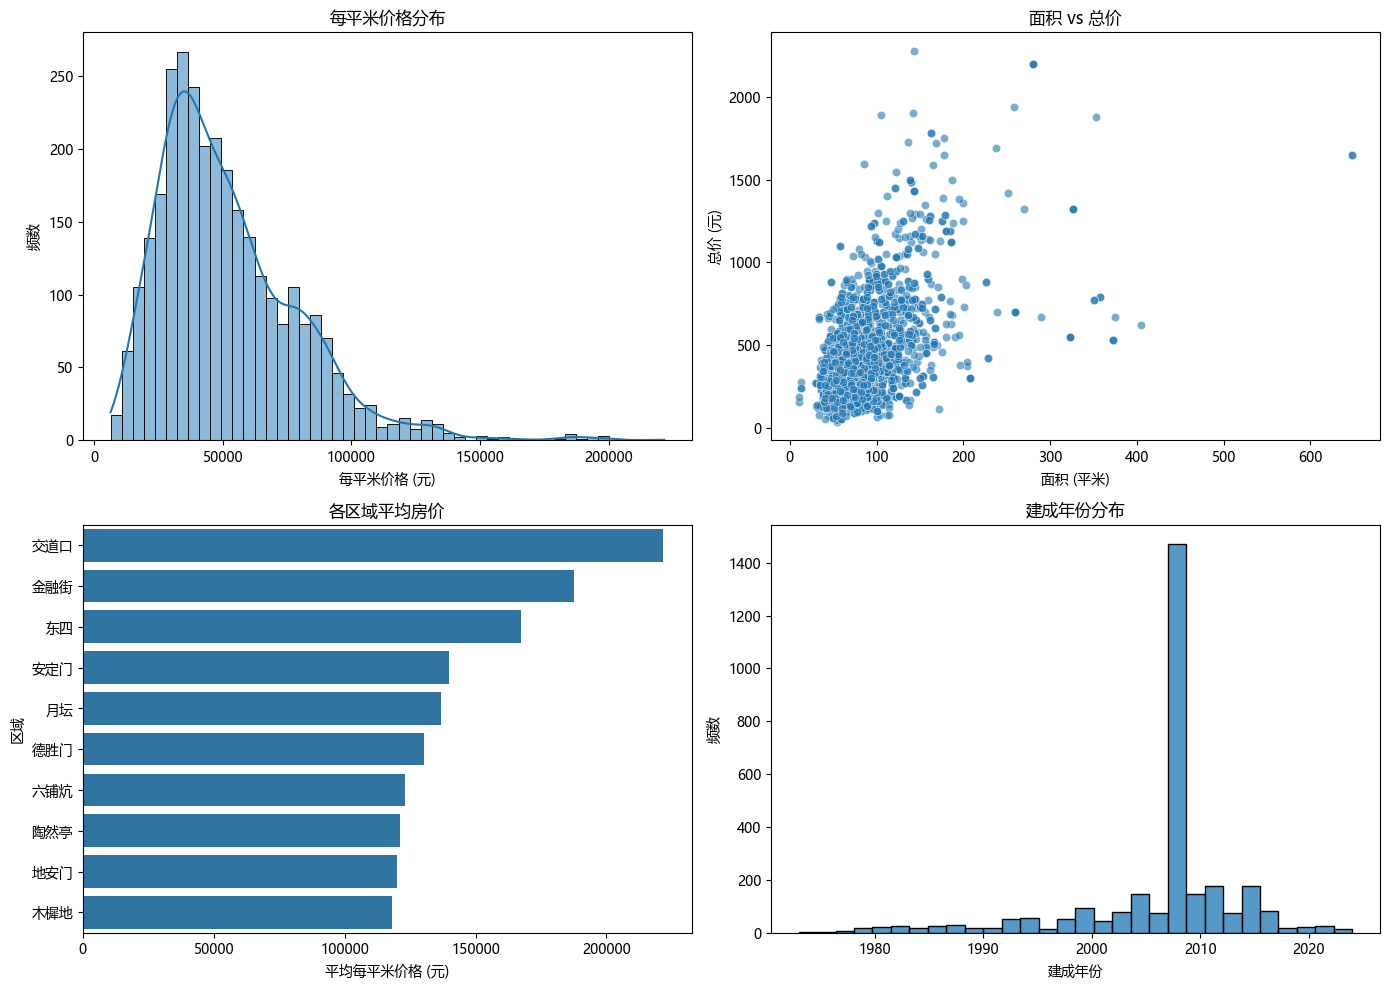

In [3]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # Windows 系统常见的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 忽略未来版本影响
warnings.filterwarnings('ignore')

# 1. 读取CSV文件
df = pd.read_csv("./lianjia_data.csv")

# 2. 数据预处理
# 将“价格”列去除单位和逗号，并转换为float
df["price"] = df["price"].str.replace("元/平", "").str.replace(",", "").astype(float)

# 将“面积”列去除“平米”单位，并转换为float
df["area"] = df["area"].str.replace("平米", "").astype(float)

# 从“建成年份”中提取年份（格式为“xxxx年”）
df["build_year"] = df["build_time"].str.extract(r"(\d{4})").astype(float)

# 从“户型”中提取房间数和厅数，例如“2室1厅”
df["rooms"] = df["house_types"].str.extract(r"(\d+)室").astype(float)
df["halls"] = df["house_types"].str.extract(r"(\d+)厅").astype(float)

# 对缺失的建成年份用中位数填充（防止模型出错）
df["build_year"].fillna(df["build_year"].median(), inplace=True)

# 3. 可视化分析
plt.figure(figsize=(14, 10))

# (1) 每平米价格分布
plt.subplot(2, 2, 1)
sns.histplot(df["price"], bins=50, kde=True)
plt.title("每平米价格分布")
plt.xlabel("每平米价格 (元)")
plt.ylabel("频数")

# (2) 面积 vs 总价的散点图
plt.subplot(2, 2, 2)
sns.scatterplot(x="area", y="total_price", data=df, alpha=0.6)
plt.title("面积 vs 总价")
plt.xlabel("面积 (平米)")
plt.ylabel("总价 (元)")

# (3) 区域平均房价（按区域分组后取平均）
plt.subplot(2, 2, 3)
region_avg = df.groupby("region")["price"].mean().sort_values(ascending=False).head(10)  # 只显示前10个区域
sns.barplot(x=region_avg.values, y=region_avg.index)
plt.title("各区域平均房价")
plt.xlabel("平均每平米价格 (元)")
plt.ylabel("区域")

# (4) 建成年份分布直方图
plt.subplot(2, 2, 4)
sns.histplot(df["build_year"].dropna(), bins=30)
plt.title("建成年份分布")
plt.xlabel("建成年份")
plt.ylabel("频数")

plt.tight_layout()
plt.show()